# Demostraci√≥n: Regresi√≥n Multivariada en Python

Este notebook fue creado como apoyo para la asignatura **Formulaci√≥n y Evaluaci√≥n de Proyectos**.

Su objetivo es mostrar, de manera pr√°ctica, c√≥mo aplicar una **regresi√≥n lineal multivariada** utilizando Python, con el fin de **predecir las ventas** de un producto a partir de varias variables que pueden influir en ellas.

---

## Contenido:
1. Introducci√≥n a la regresi√≥n multivariada  
2. Cargar y explorar el conjunto de datos  
3. Entrenamiento del modelo  
4. Evaluaci√≥n e interpretaci√≥n de resultados
5. Predicci√≥n y simulaci√≥n de escenarios  


# 1. Introducci√≥n a la regresi√≥n multivariada

En el contexto de la **formulaci√≥n y evaluaci√≥n de proyectos**, es com√∫n que las decisiones se basen en datos:  
por ejemplo, estimar **las ventas de un producto** seg√∫n el **precio**, la **inversi√≥n en publicidad** o la **√©poca del a√±o**.

La **regresi√≥n lineal** es una herramienta estad√≠stica que permite **modelar relaciones entre variables** y **predecir resultados**.

---

### üîπ Regresi√≥n lineal simple

En la regresi√≥n lineal simple, se busca una relaci√≥n entre una variable dependiente \( y \) y una sola variable independiente \( x \):

$$y = \beta_0 + \beta_1 x + \varepsilon$$

Por ejemplo:
> *Ventas* en funci√≥n del *precio*.

---

### üîπ Regresi√≥n lineal multivariada

En la pr√°ctica, muchos fen√≥menos dependen de **m√°s de una variable**.  
La regresi√≥n multivariada extiende el modelo anterior para incluir varias variables independientes:

$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n + \varepsilon$$

Cada coeficiente \( \beta_i \) mide el **efecto de esa variable sobre \( y \)**, manteniendo las dem√°s constantes.

Por ejemplo:

$$\text{Ventas} = \beta_0 + \beta_1 (\text{Precio}) + \beta_2 (\text{Publicidad}) + \beta_3 (\text{Temporada}) + \varepsilon$$

---

### ¬øPara qu√© se usa?

- **Predecir resultados futuros** (por ejemplo, ventas esperadas).  
- **Medir el impacto de distintas variables** sobre un objetivo.  
- **Apoyar decisiones de negocio** mediante evidencia cuantitativa.  

---

En las siguientes secciones, veremos c√≥mo crear un conjunto de datos simulado y aplicar este modelo paso a paso usando **Python**.


# 2. Cargar y explorar el conjunto de datos

Antes de entrenar un modelo (como un modelo de regresi√≥n en este caso), es fundamental **entender los datos** con los que vamos a trabajar.

En este ejemplo, contamos con un archivo llamado `ventas.csv` (generado previamente con un script en Python) que contiene informaci√≥n simulada (datos sint√©ticos) sobre las ventas de un producto.

Cada fila representa un registro con las siguientes columnas:

| Variable | Descripci√≥n |
|-----------|--------------|
| **precio** | Precio del producto (en d√≥lares) |
| **publicidad** | Inversi√≥n en publicidad (en unidades monetarias) |
| **temporada** | 1 si es temporada alta, 0 si es baja |
| **ventas** | Ventas totales del producto |

```{note}
Hay que tener en cuenta que, para que el modelo funcione, las variables deben ser num√©ricas. Sin embargo, con el auge de Machine Learning se han presentado m√∫ltiples t√©cnicas para hacer que variables cualitativas se vuelvan cuantitativas
```

Para cargar los datos en Python y manejarlos f√°cilmente, se usa una librer√≠a que se llama [`Pandas`](https://pandas.pydata.org/), una librer√≠a especializada para an√°lisis de datos.

In [1]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv("../data/ventas.csv")

# Mostrar las primeras filas
df.head()

precio   publicidad  temporada        ventas
0  31.236204   256.572534          1   4475.710726
1  48.521429  1345.538740          1   6570.247643
2  41.959818   765.840766          0   4100.399744
3  37.959755  1115.427244          0   6295.414389
4  24.680559  1833.619653          1  11050.270921

Ahora vamos a usar varias funciones de `Pandas` para hacer una exploraci√≥n inicial de los datos

In [2]:
# Informaci√≥n general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   precio      100 non-null    float64
 1   publicidad  100 non-null    float64
 2   temporada   100 non-null    int64  
 3   ventas      100 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 3.3 KB


In [3]:
# Resumen estad√≠stico
df.describe().round(2)

precio  publicidad  temporada    ventas
count  100.00      100.00     100.00    100.00
mean    34.11     1096.10       0.55   6936.50
std      8.92      527.60       0.50   2160.21
min     20.17      212.51       0.00   2099.64
25%     25.80      635.61       0.00   5218.68
50%     33.92     1110.12       1.00   6790.58
75%     41.91     1579.13       1.00   8579.08
max     49.61     1974.17       1.00  12836.96

Ahora vamos a graficar para observar tendencias y relaciones entre las variables, adem√°s de su distribuci√≥n. Para esto usamos dos librer√≠as que son [`Seaborn`](https://seaborn.pydata.org/) (que es muy especializada en visualizaci√≥n de datos estad√≠sticos) y [`matplotlib`](https://matplotlib.org/) (m√°s general para visualizaciones)

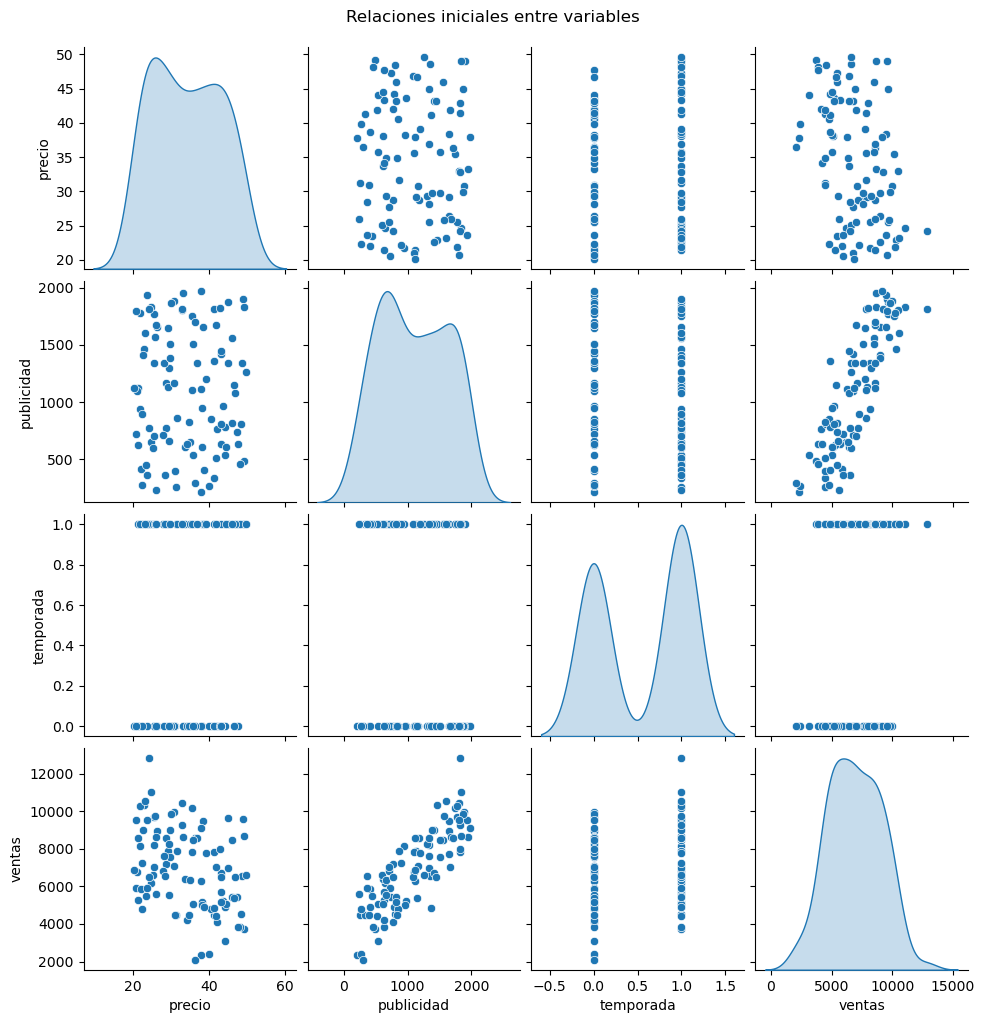

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, diag_kind="kde")
plt.suptitle("Relaciones iniciales entre variables", y=1.02)
plt.show()

A partir de este conjunto de datos observamos que:

- Las **ventas** tienden a aumentar cuando **la publicidad** crece.  
- El **precio** tiene un efecto negativo sobre las ventas (a mayor precio, menores ventas).  
- La variable **temporada** separa los datos en dos grupos visibles (alta y baja).  

En la siguiente secci√≥n aplicaremos el modelo de **regresi√≥n multivariada** para cuantificar estos efectos y obtener una ecuaci√≥n que nos permita predecir las ventas.


# 3. Entrenamiento del modelo de regresi√≥n multivariada

Una vez que comprendemos las variables con las que estamos trabajando, el siguiente paso es **entrenar el modelo**.

En este caso, utilizaremos la clase `LinearRegression` de la librer√≠a `scikit-learn`, una de las m√°s utilizadas en Python para machine learning.

---

### üîπ ¬øQu√© significa "entrenar"?

Entrenar un modelo significa **encontrar los valores √≥ptimos de los coeficientes** $\beta_0, \beta_1, \beta_2, \dots$ en la ecuaci√≥n:

$$\text{Ventas} = \beta_0 + \beta_1 (\text{Precio}) + \beta_2 (\text{Publicidad}) + \beta_3 (\text{Temporada}) + \varepsilon$$

De esta forma, el modelo "aprende" c√≥mo cada variable afecta a las ventas, buscando minimizar el error entre las **ventas reales** y las **ventas predichas**.

---

### üîπ Paso a paso:

1. **Separar** las variables independientes (precio, publicidad, temporada) de la dependiente (ventas).  
2. **Crear** el modelo con `LinearRegression()`.  
3. **Entrenarlo** usando `.fit()`.  
4. **Examinar los coeficientes** obtenidos.


In [6]:
from sklearn.linear_model import LinearRegression

# 1. Definir variables independientes (X) y dependiente (y)
X = df[["precio", "publicidad", "temporada"]]
y = df["ventas"]

# 2. Crear el modelo
modelo = LinearRegression()

# 3. Entrenar (ajustar) el modelo
modelo.fit(X, y)

LinearRegression()

In [7]:

# 4. Extraer coeficientes e intercepto
coeficientes = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": modelo.coef_
})

intercepto = modelo.intercept_

# Mostrar resultados
display(coeficientes)
print(f"Intercepto (Œ≤‚ÇÄ): {intercepto:.2f}")


Variable  Coeficiente
0      precio   -89.682658
1  publicidad     3.579734
2   temporada  1415.061601

Intercepto (Œ≤‚ÇÄ): 5293.15


### Interpretaci√≥n de los coeficientes

Cada coeficiente $( \beta_i)$ representa el **efecto promedio** que tiene esa variable sobre las ventas, *manteniendo las dem√°s constantes*.

Por ejemplo:

- Si el coeficiente del **precio** es negativo, significa que al aumentar el precio, las ventas tienden a disminuir.  
- Si el coeficiente de **publicidad** es positivo, implica que una mayor inversi√≥n en publicidad incrementa las ventas.  
- Si el coeficiente de **temporada** es positivo, muestra que en temporada alta se venden m√°s unidades, incluso si el precio y la publicidad se mantienen iguales.

El **intercepto** \( \beta_0 \) indica el valor promedio esperado de las ventas cuando todas las variables son 0 (sirve como punto de referencia, no necesariamente tiene sentido pr√°ctico directo).

---

En resumen, el modelo ha "aprendido" la ecuaci√≥n que mejor relaciona las variables con las ventas observadas.

La siguiente celda solo es para mostrar la ecuaci√≥n que result√≥ del modelo

In [9]:
# Mostrar la ecuaci√≥n estimada del modelo
ecuacion = f"Ventas = {intercepto:.2f}"
for var, coef in zip(X.columns, modelo.coef_):
    signo = "+" if coef >= 0 else "-"
    ecuacion += f" {signo} {abs(coef):.2f}*{var}"
    
print("Ecuaci√≥n estimada del modelo:")
print(ecuacion)


Ecuaci√≥n estimada del modelo:
Ventas = 5293.15 - 89.68*precio + 3.58*publicidad + 1415.06*temporada


En esta etapa, el modelo ya est√° entrenado y conocemos los coeficientes que explican c√≥mo cada variable incide en las ventas.

En la siguiente secci√≥n, evaluaremos qu√© tan bien se ajusta este modelo a los datos observados y qu√© tan confiables son sus predicciones.


# 4. Evaluaci√≥n del modelo y an√°lisis de resultados

Una vez que el modelo de regresi√≥n ha sido entrenado, debemos preguntarnos:

> ¬øQu√© tan bien explica el modelo los datos reales?

Para responderlo, usaremos **m√©tricas de desempe√±o** y **gr√°ficas de comparaci√≥n** entre los valores reales y los predichos.

---

### üîπ Principales m√©tricas:

- **R¬≤ (Coeficiente de determinaci√≥n):** mide qu√© porcentaje de la variabilidad de las ventas es explicada por el modelo.  
  - Un valor cercano a 1 indica un buen ajuste.
  - Un valor cercano a 0 indica que el modelo no explica bien los datos.

- **MAE (Error Absoluto Medio):** promedio de los errores absolutos entre predicciones y valores reales.

- **RMSE (Ra√≠z del Error Cuadr√°tico Medio):** penaliza m√°s los errores grandes.  
  - Cuanto m√°s bajo, mejor.

Estas m√©tricas nos permiten evaluar si el modelo es √∫til para tomar decisiones. Est√°n implementadas tambi√©n en la librer√≠a `scikit learn`


In [10]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Predicciones del modelo
y_pred = modelo.predict(X)

# Calcular m√©tricas
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Mostrar resultados
print("üìà Resultados del modelo:")
print(f"R¬≤: {r2:.3f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


üìà Resultados del modelo:
R¬≤: 0.938
MAE: 429.21
RMSE: 537.13


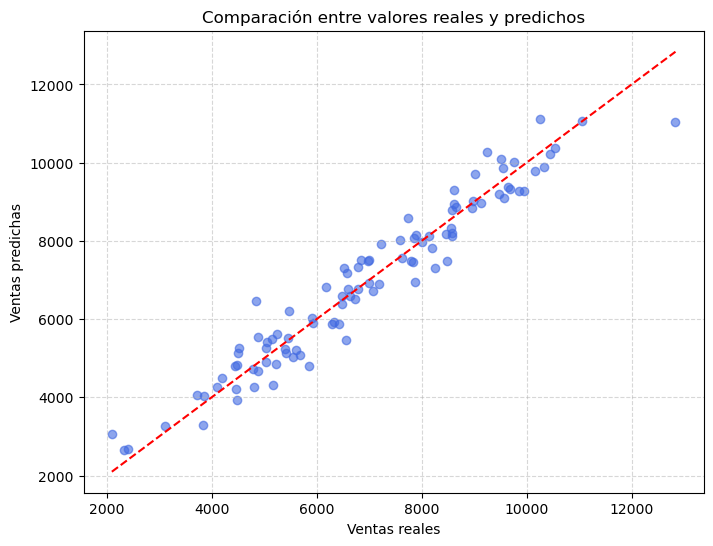

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(y, y_pred, color='royalblue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel("Ventas reales")
plt.ylabel("Ventas predichas")
plt.title("Comparaci√≥n entre valores reales y predichos")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


Si los puntos se acercan a la l√≠nea roja (que representa el ajuste perfecto), el modelo est√° funcionando bien.

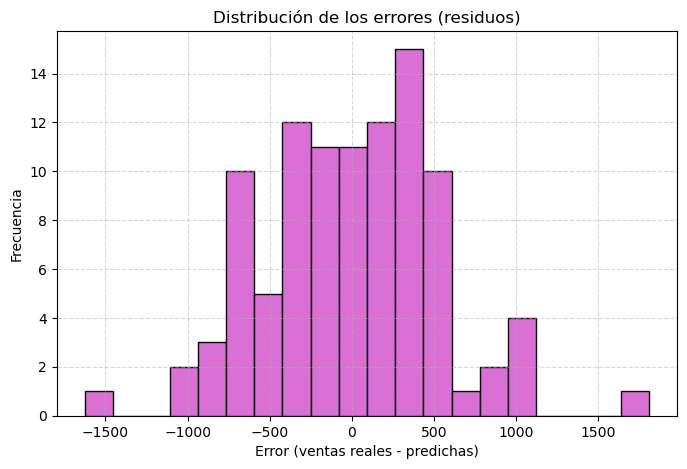

In [13]:
residuos = y - y_pred

plt.figure(figsize=(8,5))
plt.hist(residuos, bins=20, color='orchid', edgecolor='black')
plt.title("Distribuci√≥n de los errores (residuos)")
plt.xlabel("Error (ventas reales - predichas)")
plt.ylabel("Frecuencia")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


Si los errores est√°n distribuidos de forma sim√©trica alrededor de 0,
significa que el modelo no tiene sesgo sistem√°tico (no sobreestima ni subestima consistentemente).

### Interpretaci√≥n de resultados

- **R¬≤ alto (‚â• 0.8):** el modelo explica gran parte de la variaci√≥n de las ventas.  
- **Errores bajos (MAE, RMSE):** las predicciones son cercanas a los valores reales.  
- **Gr√°fico de dispersi√≥n:** los puntos deben alinearse lo m√°s posible con la l√≠nea diagonal.  
- **Histograma de residuos:** debe tener forma aproximadamente sim√©trica alrededor de cero.

En conjunto, estos indicadores nos permiten concluir si la regresi√≥n multivariada es un modelo adecuado para predecir las ventas con base en las variables elegidas.


Con esta evaluaci√≥n, podemos determinar si nuestro modelo es √∫til o si necesitamos ajustar las variables,
a√±adir m√°s informaci√≥n, o probar t√©cnicas m√°s avanzadas.

En la siguiente secci√≥n veremos c√≥mo utilizar este modelo para **hacer predicciones sobre nuevos escenarios**,
como estimar las ventas esperadas bajo distintas estrategias de precio o publicidad.


# 5. Predicci√≥n y simulaci√≥n de escenarios

Una de las mayores ventajas de un modelo de regresi√≥n es que nos permite **hacer predicciones**.

Podemos estimar las ventas esperadas bajo distintas condiciones, como por ejemplo:

- Cambiar el precio del producto  
- Aumentar el presupuesto de publicidad  
- Simular una temporada alta o baja

Esto se conoce como **an√°lisis de escenarios**, y ayuda a responder preguntas como:

> ‚Äú¬øQu√© pasar√≠a con las ventas si invierto un 20% m√°s en publicidad?‚Äù  
> ‚Äú¬øQu√© efecto tendr√≠a reducir el precio en un 10%?‚Äù


In [14]:
# Crear un nuevo conjunto de condiciones (escenarios)
nuevos_escenarios = pd.DataFrame({
    "precio": [50, 45, 55],
    "publicidad": [5000, 6000, 4000],
    "temporada": [1, 0, 1]
})

# Generar las predicciones de ventas
predicciones = modelo.predict(nuevos_escenarios)

# Mostrar resultados
resultados = nuevos_escenarios.copy()
resultados["ventas_estimadas"] = predicciones
display(resultados)


precio  publicidad  temporada  ventas_estimadas
0      50        5000          1      20122.742984
1      45        6000          0      22735.828311
2      55        4000          1      16094.596055

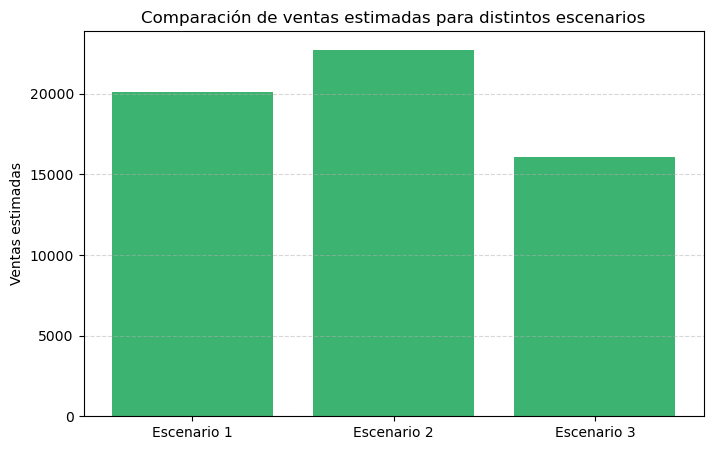

In [15]:
plt.figure(figsize=(8,5))
plt.bar(resultados.index, resultados["ventas_estimadas"], color='mediumseagreen')
plt.xticks(resultados.index, ["Escenario 1", "Escenario 2", "Escenario 3"])
plt.ylabel("Ventas estimadas")
plt.title("Comparaci√≥n de ventas estimadas para distintos escenarios")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()


In [16]:
# # Ejecutar solo en colab
# from ipywidgets import interact

# def simular_ventas(precio=50, publicidad=5000, temporada=1):
#     entrada = pd.DataFrame({
#         "precio": [precio],
#         "publicidad": [publicidad],
#         "temporada": [temporada]
#     })
#     pred = modelo.predict(entrada)[0]
#     print(f"üîπ Ventas estimadas: {pred:.2f}")

# interact(simular_ventas, precio=(30,70,1), publicidad=(1000,10000,500), temporada=(0,1,1))


### Interpretaci√≥n

- Un **precio m√°s bajo** suele incrementar las ventas (coeficiente negativo en el modelo).  
- Mayor **inversi√≥n en publicidad** tiende a aumentar las ventas (coeficiente positivo).  
- Si la variable de **temporada** es 1 (alta), las ventas tambi√©n crecen.
